Подключение пространства имен с сервисом данных, работающий с json

In [10]:
from Factories.JsonDataSvcFactory import DataServiceFactory

Клиентская часть для использования сервиса данных

In [11]:
factory = DataServiceFactory()

edaDataService = factory.GetEDADataService('../files/bdd100k_labels_images_train.json')
categories = edaDataService.GetCategories()

print('Вывод уникальных категорий:')
for category in categories:
    print(category, edaDataService.GetCategoryCount(category), sep=': ')

scenes = edaDataService.GetScenes()

print('\nВывод уникальных сцен:')
for scene in scenes:
    print(scene, edaDataService.GetSceneCount(scene), sep=': ')

weathers = edaDataService.GetWeathers()

print('\nВывод уникальных погод:')
for weather in weathers:
    print(weather, edaDataService.GetWeatherCount(weather), sep=': ')

timesOfDay = edaDataService.GetTimesOfDay()

print('\nВывод уникальных частей дня:')
for timeOfDay in timesOfDay:
    print(timeOfDay, edaDataService.GetTimeOfDayCount(timeOfDay), sep=': ')

Вывод уникальных категорий:
bike: 7210
bus: 11672
car: 713211
drivable area: 125723
lane: 528643
motor: 3002
person: 91349
rider: 4517
traffic light: 186117
traffic sign: 239686
train: 136
truck: 29971

Вывод уникальных сцен:
city street: 43516
gas stations: 27
highway: 17379
parking lot: 377
residential: 8074
tunnel: 129
undefined: 361

Вывод уникальных погод:
clear: 37344
foggy: 130
overcast: 8770
partly cloudy: 4881
rainy: 5070
snowy: 5549
undefined: 8119

Вывод уникальных частей дня:
dawn/dusk: 5027
daytime: 36728
night: 27971
undefined: 137


Подготовка списка количеств тех или иных объектов и признаков

In [12]:
categoriesCounts = [edaDataService.GetCategoryCount(x) for x in categories]
scenesCounts = [edaDataService.GetSceneCount(x) for x in scenes]
weathersCounts = [edaDataService.GetWeatherCount(x) for x in weathers]
timesCounts = [edaDataService.GetTimeOfDayCount(x) for x in timesOfDay]

Подготовка метода для отображения графиков

In [13]:
from matplotlib import pyplot as plt

def show_graphic(x_data, y_data, title):
    fig, ax = plt.subplots(figsize =(16, 9))

    ax.barh(x_data, y_data)

    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)

    ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)

    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize = 10, fontweight ='bold',
                 color ='grey')

    ax.set_title(title,
                 loc ='left', )

    plt.show()

Вывод графика с соотношением количества категорий во всем датасете

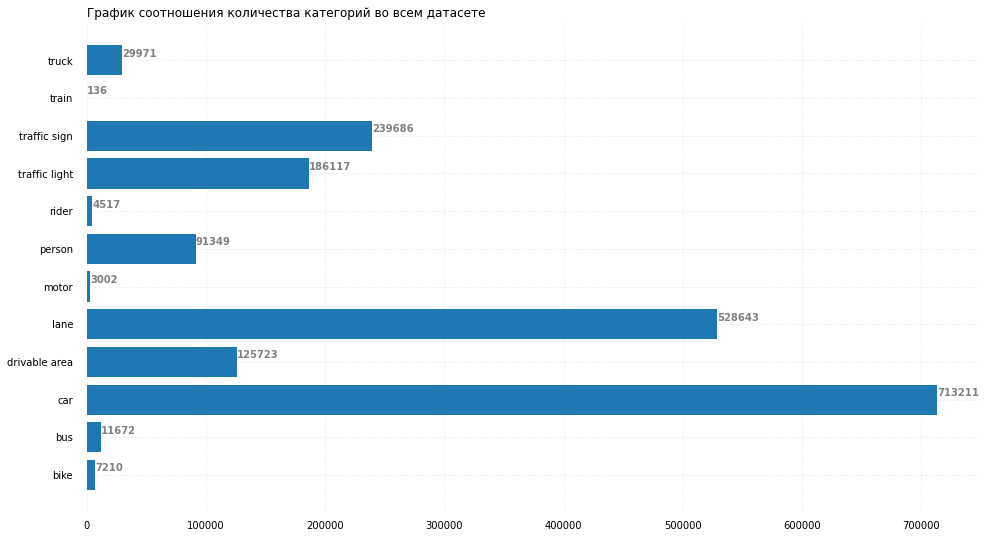

In [14]:
show_graphic(categories, categoriesCounts, 'График соотношения количества категорий во всем датасете')

Вывод графика с соотношением количества определенных типов сцен во всем датасете

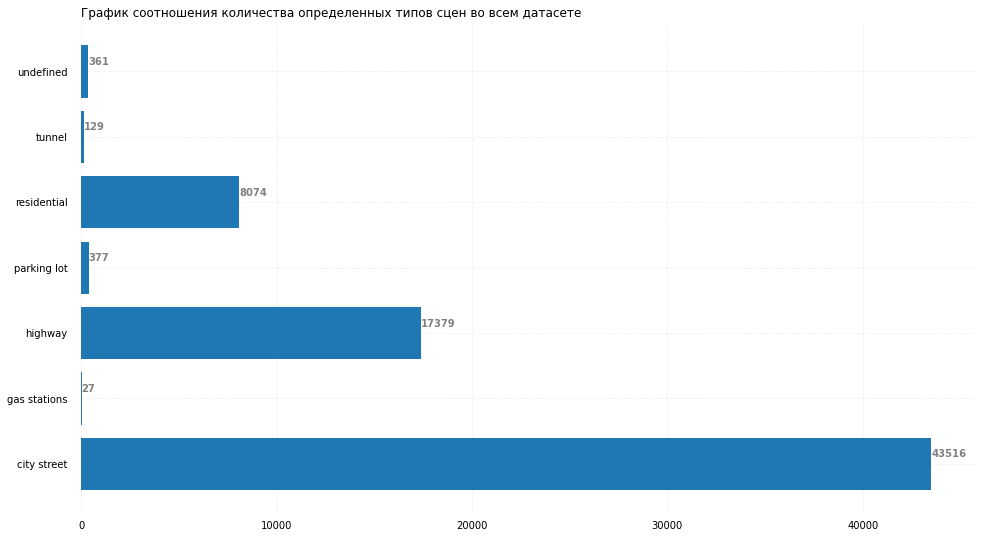

In [15]:
show_graphic(scenes, scenesCounts, 'График соотношения количества определенных типов сцен во всем датасете')

Вывод графика с соотношением количества погод во всем датасете

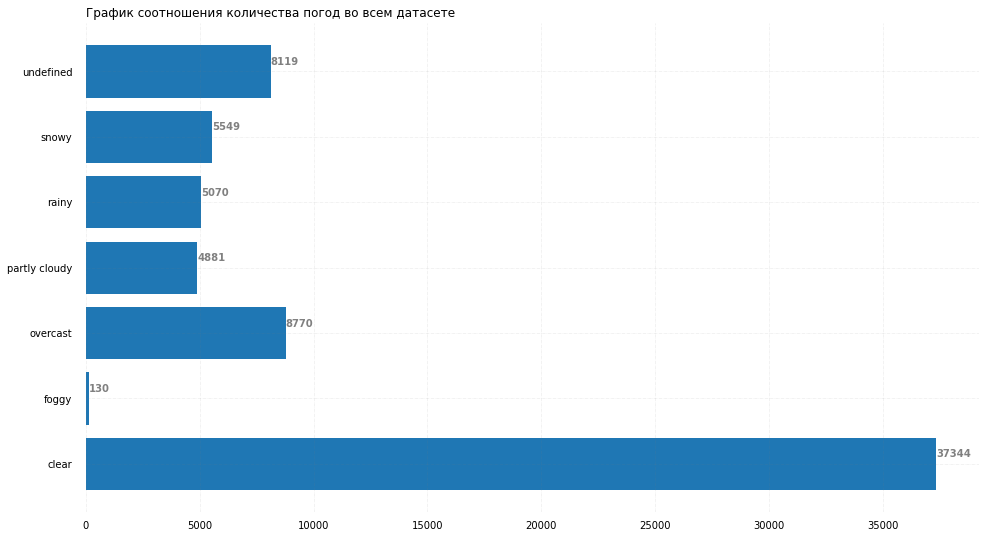

In [16]:
show_graphic(weathers, weathersCounts, 'График соотношения количества погод во всем датасете')

Вывод графика с соотношением количества различных типов времен дня во всем датасете

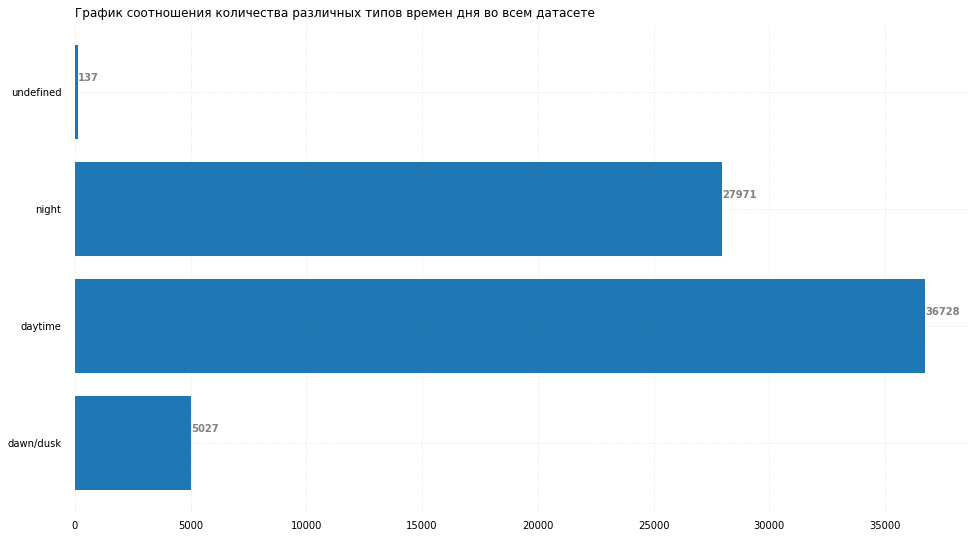

In [17]:
show_graphic(timesOfDay, timesCounts, 'График соотношения количества различных типов времен дня во всем датасете')